#Supervised Learning

Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team.
Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for
developing a AIML model which can predict the condition of the patient depending on the received test results.

# Importing all libraries

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline

# 1. Data Understanding:

A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables.

In [92]:
df1 = pd.read_csv('Downloads/Part1_Normal.csv')
df2 = pd.read_csv('Downloads/Part1_Type_S.csv')
df3 = pd.read_csv('Downloads/Part1_Type_H.csv')

B. Print Shape and columns of all the 3 DataFrames. 

In [93]:
df1.shape

(100, 7)

In [94]:
df2.shape

(150, 7)

In [95]:
df3.shape

(60, 7)

There are 7 columns in all three datasets

C. Compare Column names of all the 3 DataFrames and clearly write observations.

In [96]:
df1.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [97]:
df1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [98]:
df2.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [99]:
df2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [100]:
df3.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [101]:
df3.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


We infer from above output that "Class" is a categorical independent variable indicating this belongs to classification problem and remaining attributes are the same on all three datasets

D. Print DataTypes of all the 3 DataFrames. 

In [102]:
df1.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [103]:
df2.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [104]:
df3.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

We infer that class is of object type and other attributes are numerical. 

E. Observe and share variation in ‘Class’ feature of all the 3 DataFrames. 

In [105]:
df1.describe(include = 'all')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Normal
freq,NaN,NaN,NaN,NaN,NaN,NaN,73
mean,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572,NaN
std,12.368161,6.778503,12.361388,9.624004,9.014246,6.307483,NaN
min,30.741938,-5.845994,19.071075,17.386972,100.501192,-11.058179,NaN
25%,42.817849,8.799951,35.000000,32.340487,118.182659,-1.511360,NaN
50%,50.123115,13.482435,42.638923,37.059694,123.874328,1.152710,NaN
75%,61.470097,16.785953,51.602346,44.608788,129.040401,4.968807,NaN


In [106]:
df1['Class'].value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

Here Normal and Nrmal represents same class.

In [107]:
df2.describe(include = 'all')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Type_S
freq,NaN,NaN,NaN,NaN,NaN,NaN,133
mean,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687,NaN
std,15.109337,11.506169,16.397068,12.318813,15.579995,40.108030,NaN
min,37.903910,-6.554948,24.710274,19.290046,70.082575,1.010041,NaN
25%,60.658136,13.461149,52.000000,43.166815,104.706761,30.393271,NaN
50%,72.149306,19.309548,62.555200,50.751695,114.842400,42.372509,NaN
75%,81.075893,29.229680,76.990924,56.675435,123.337307,61.894425,NaN


In [108]:
df2['Class'].value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

Here tp_s and Type_S represents same class.

In [109]:
df3.describe(include = 'all')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Type_H
freq,NaN,NaN,NaN,NaN,NaN,NaN,37
mean,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251,NaN
std,10.697131,7.016708,9.767795,7.555388,9.355720,5.531177,NaN
min,26.147921,3.144669,14.000000,13.366931,84.241415,-10.675871,NaN
25%,41.018099,12.874329,29.038069,25.215275,112.280320,-0.910819,NaN
50%,46.416169,16.949285,35.164873,30.000659,116.696146,2.542441,NaN
75%,53.922329,22.002980,42.011563,34.962103,122.042999,6.059666,NaN


In [110]:
df3['Class'].value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

Here Type_H and type_h represents same class.

# 2. Data Preparation and Exploration:

A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. 
For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’

In [111]:
df1.loc[df1['Class']=='Nrmal','Class']='Normal'
df2.loc[df2['Class']=='tp_s','Class']='Type_S'
df3.loc[df3['Class']=='type_h','Class']='Type_H'

B. Combine all the 3 DataFrames to form a single DataFrame 
Checkpoint: Expected Output shape = (310,7)

In [112]:
df = pd.concat([df1, df2, df3])

In [113]:
df.shape

(310, 7)

C. Print 5 random samples of this DataFrame

In [114]:
df.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
35,31.484218,7.826221,24.284818,23.657997,113.833145,4.393080,Type_H
20,65.611802,23.137919,62.582179,42.473883,124.128001,-4.083298,Normal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
53,33.788843,3.675110,25.500000,30.113733,128.325356,-1.776111,Normal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H


D. Print Feature-wise percentage of Null values.

In [115]:
percent_missing = df.isnull().sum() * 100 / len(df)

In [116]:
percent_missing

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

There is no missing value in the dataset

 E. Check 5-point summary of the new DataFrame. 

In [117]:
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


P_incidence:
Mean and Median are nearly equal .
Distribution might be normal. we have 75 % of values are less than 72 but maxiumum value is 129

P_tilt:
Mean and median are nearly equal.
Distribution might be normal.
It contains negative values
75 % of values are less than 22 but maximum value is 49 so there might be little right skewness

L_angle:
Mean and Median are nearly equal. There is no deviation.
Distribution might be normal
There might be few outliers because of the maximum value

S_slope:
Mean and Median are nearly equal.
Towards the end there is little devation. 75% of values are lesser than 52 but maximum value is 121.

P_radius:
Distribution might be normal.
There is no much Deviation.

S_Degree:
Mean is greater than Median so there might be right skewness in the data .
We can see 75% of values are less than 41 but maximum value is 418 so there is obvious outliers in the data.

# 3. Data Analysis: 

A. Visualize a heatmap to understand correlation between all features

In [118]:
df_copy=df.copy(deep=True);

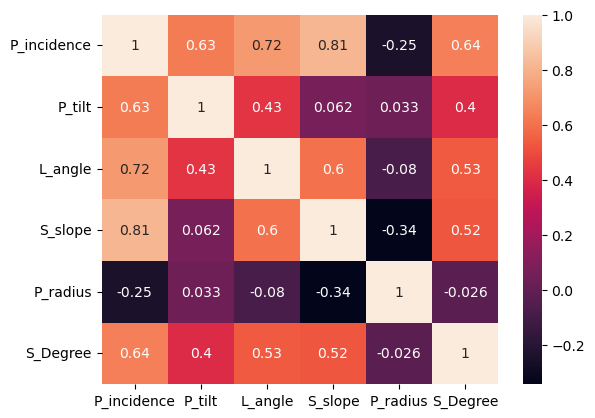

In [119]:
sns.heatmap(df_copy.corr(),annot=True);
plt.show()

B. Share insights on correlation. 

A. Features having stronger correlation with correlation value.

1. p_incidence has positive correlation with p_tilt = 0.63, L_angle = 0.72, S_slope = 0.81, S_Degree = 0.64
2. P_tilt has positive relationship with L_angle = 0.43 and S_Degree = 0.4.
3. L_angle has postive Relationship with s_slope = 0.6 and s_degree = 0.53. 
4. s_slope has positive Relationship with s_degree = 0.52.

B. Features having weaker correlation with correlation value.
1. p_incidence has negative correlation with p_radius = -0.25
2. There is no Relationship between p_tilt and s_slope & p_radius which equals 0.062 and 0.033 respectively.
3. L_angle has no Relationship with P_radius (-0.08)
4. S_degree has no strong positive Relationship with any of the variables.

C. Visualize a pairplot with 3 classes distinguished by colors and share insights.

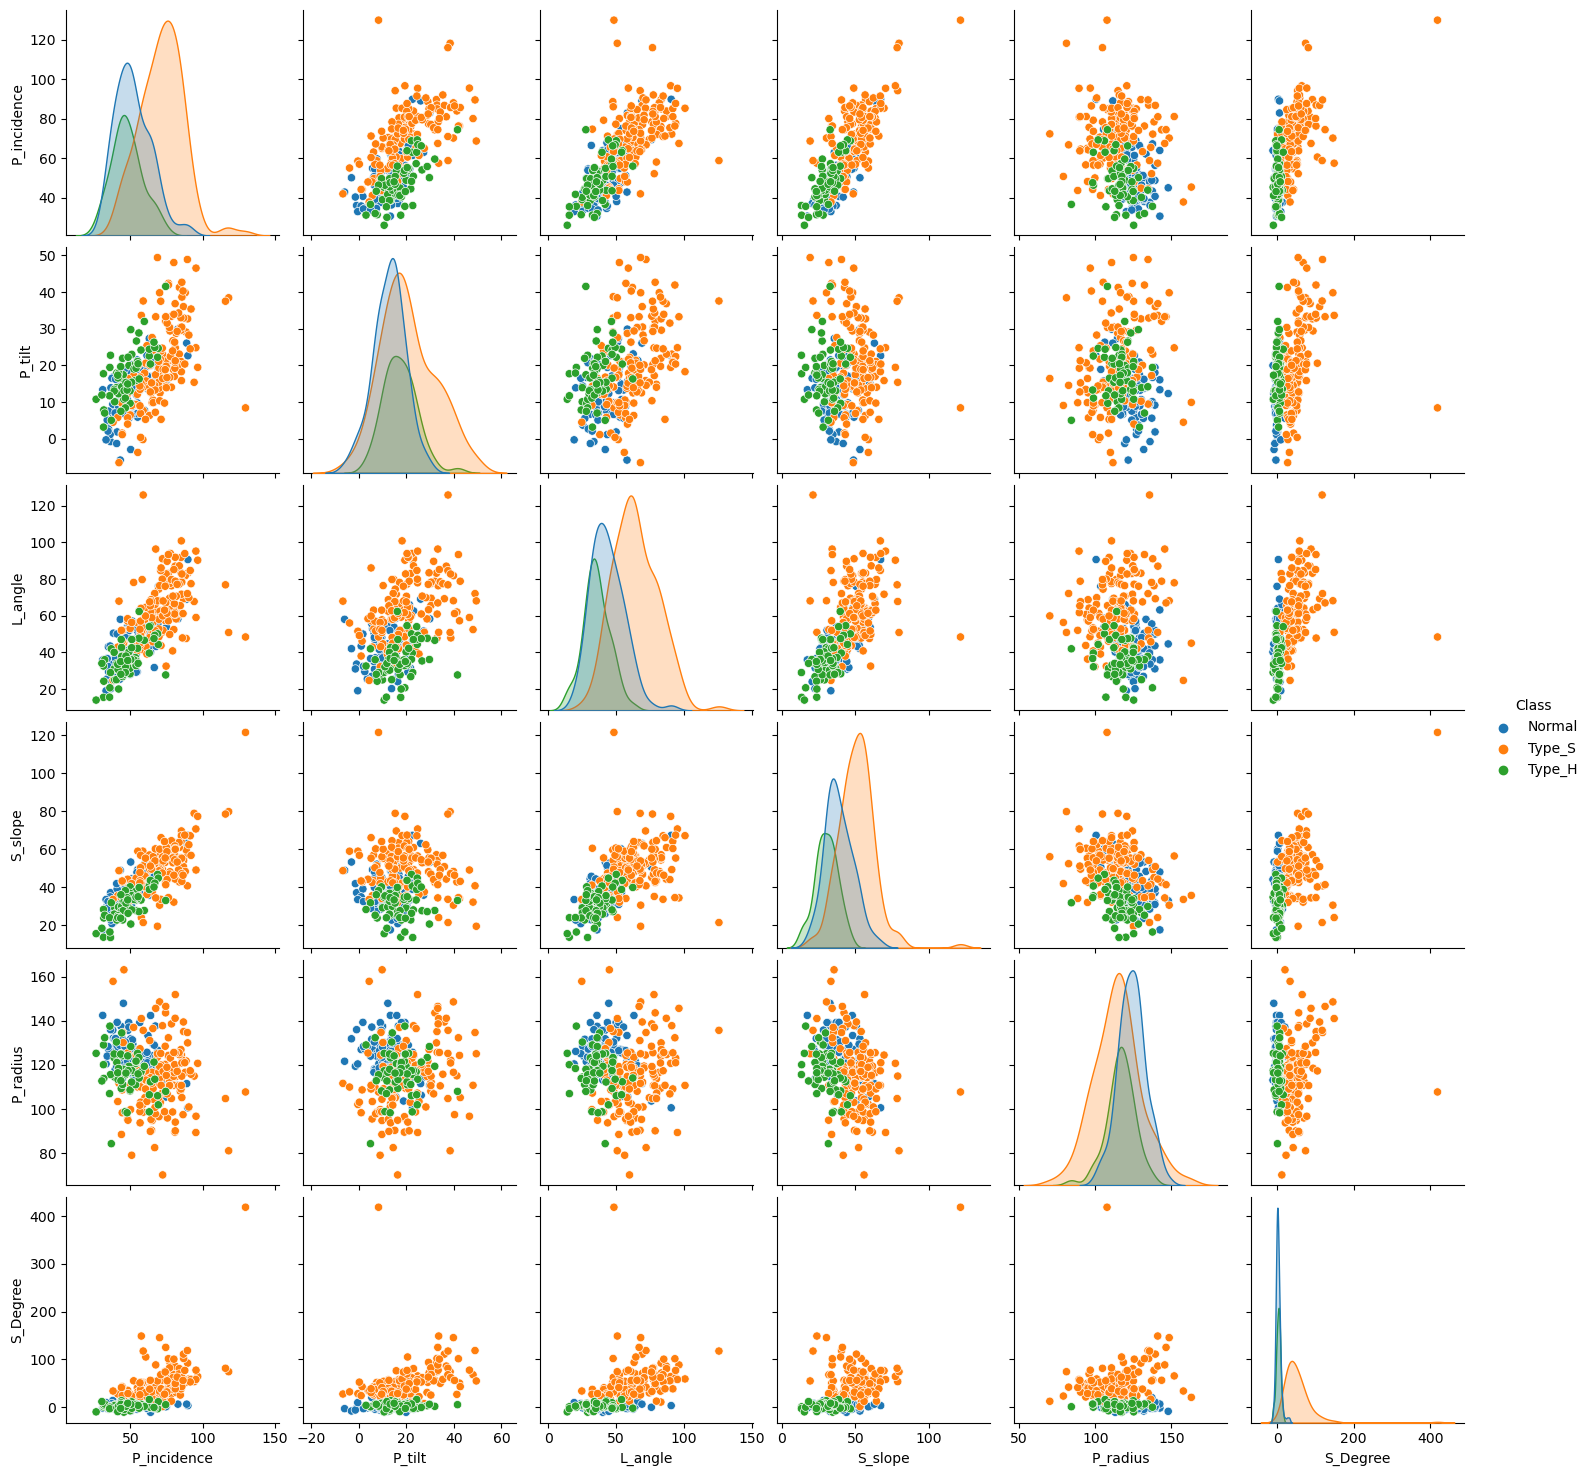

In [120]:
sns.pairplot(df_copy,hue='Class')

1. Diagonally we can see that the distribution of classes are not same.
2. It is evident that type_s class is more compared to other two. 
3. Normal class has higher values compared to Type_H

D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. 

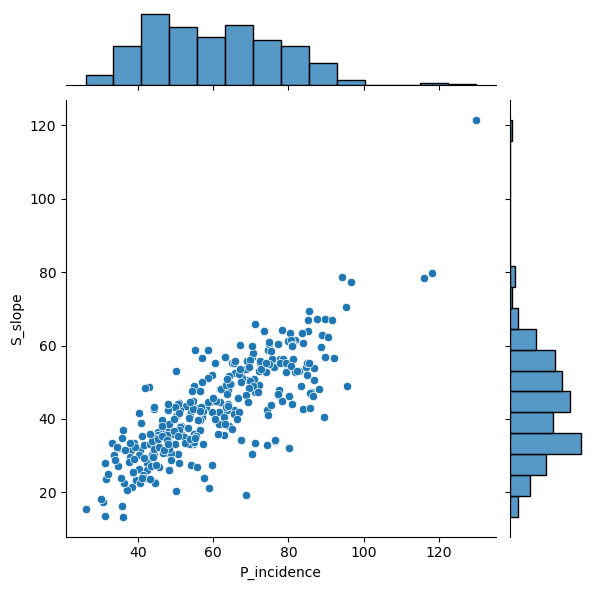

In [121]:
sns.jointplot(x = 'P_incidence', y = 'S_slope', data=df_copy);

We observe that there is a positive relationship between p_incidence and s_slope and data is right skewed. 

E. Visualize a boxplot to check distribution of the features and share insights. 

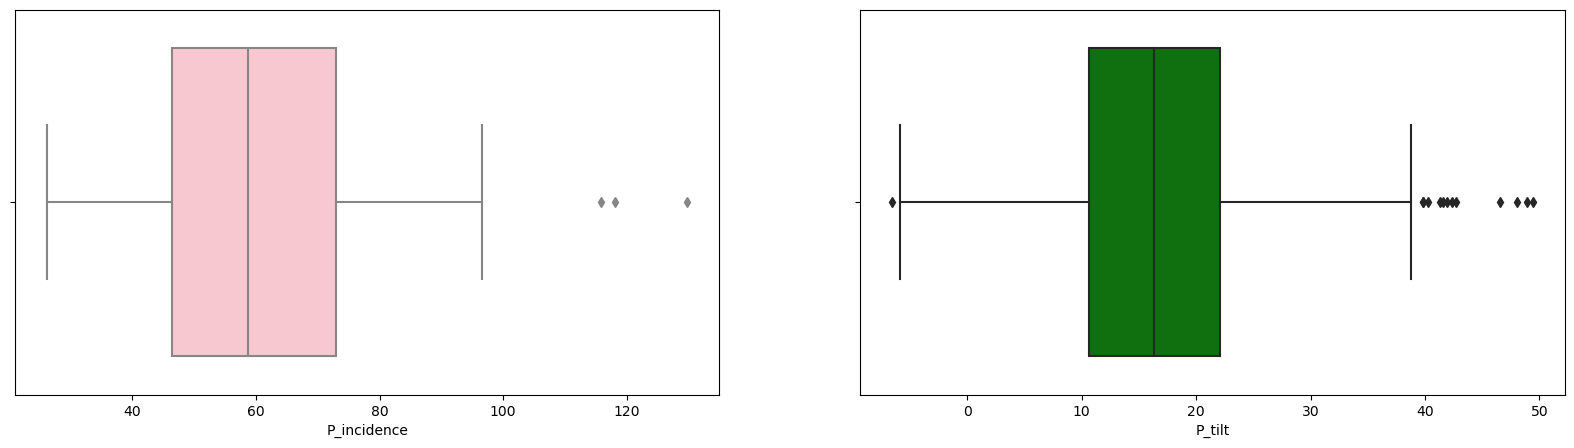

In [122]:
f, axes = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(x = 'P_incidence', data=df_copy,  orient='h' , ax=axes[0],color='Pink')
sns.boxplot(x = 'P_tilt', data=df_copy,  orient='h' , ax=axes[1],color='Green')
plt.show()

P_incidence - 
1. Data is right skewed with few outliers in the right end. 

P_tilt -
1. Data is right skewed.
2. We can see one outlier in negative end and few outliers in positive end.

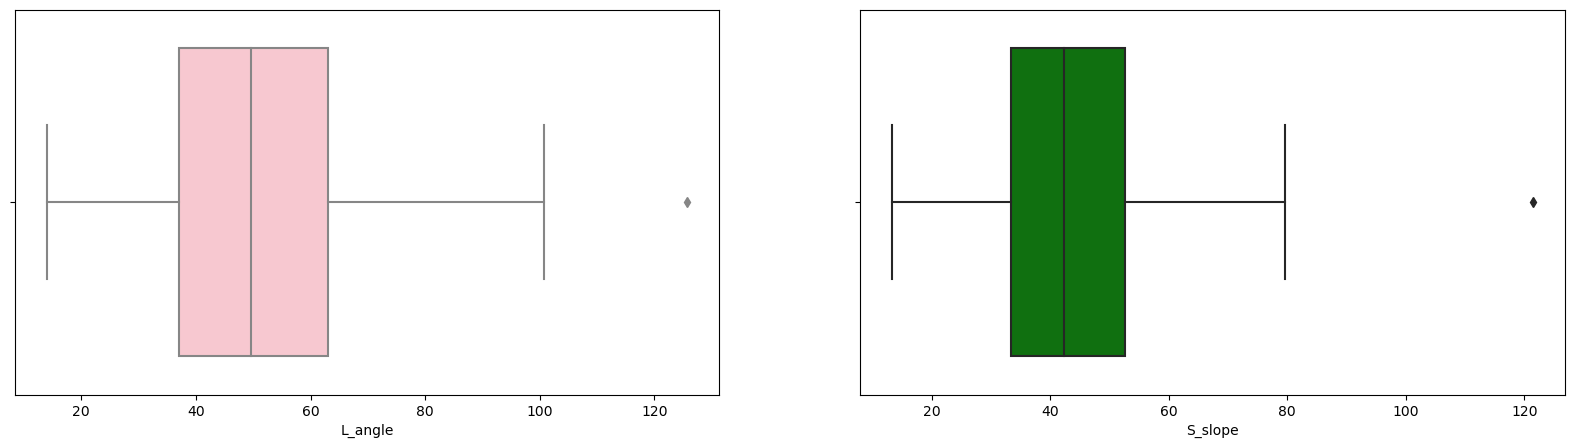

In [123]:
f, axes = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(x = 'L_angle', data=df_copy,  orient='h' , ax=axes[0],color='Pink')
sns.boxplot(x = 'S_slope', data=df_copy,  orient='h' , ax=axes[1],color='Green')
plt.show()

L_angle -
1. It is Normally distributed.
2. Slightly right skewed because of one outlier. 

S_slope -
1. There is only one outlier. 
2. Data is right skewed.

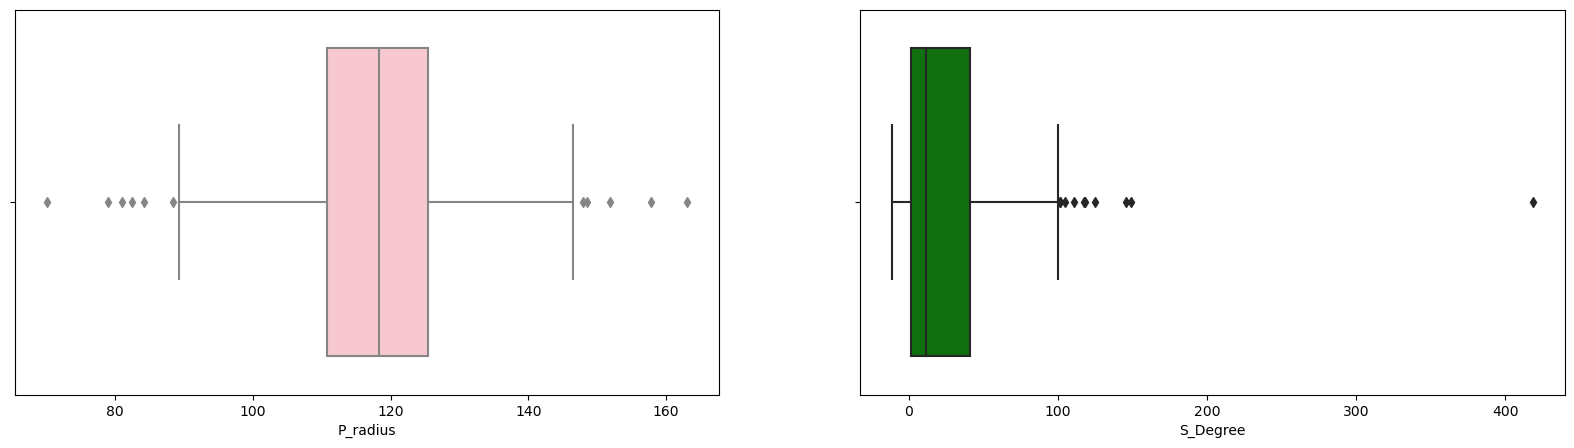

In [124]:
f, axes = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(x = 'P_radius', data=df_copy,  orient='h' , ax=axes[0],color='Pink')
sns.boxplot(x = 'S_Degree', data=df_copy,  orient='h' , ax=axes[1],color='Green')
plt.show()

P_radius - 
1. Data is normally distributed.
2. We can see outliers at both the ends.

S_Degree - 
1. There is Positive Skewness in the data
2. Highly affected by Outliers

# 4. Model Building: 

In [125]:
df_copy["Class"].value_counts(normalize=True)

Type_S    0.483871
Normal    0.322581
Type_H    0.193548
Name: Class, dtype: float64

The classes are imbalanced

<Axes: >

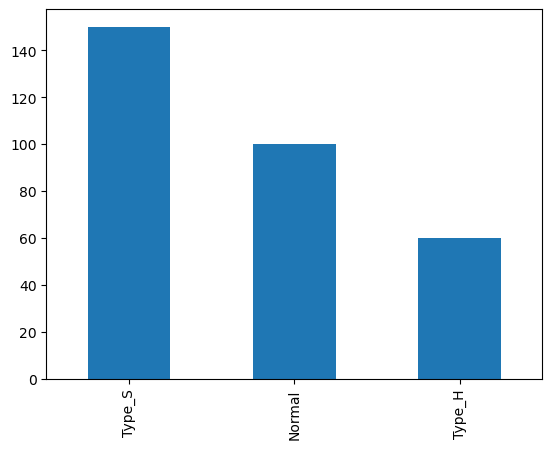

In [126]:
pd.value_counts(df_copy["Class"]).plot(kind="bar")

We have imbalanced target variable. 48% of data is occupied by Type_S.
When you have imbalance dataset, model does not learn about less distributed classes. This leads to model predicting only the majority class.

In [127]:
from sklearn.preprocessing import LabelEncoder

In [128]:
#Use label encoder to convert categorical variables to one-hot encoding (dummy variables)

le=LabelEncoder()
df_copy['Class']=le.fit_transform(df_copy['Class'])
df_copy['Class'].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

We have labeled the classes as Normal: 0, Type_H: 1 and Type_S: 2

A. Split data into X and Y.

In [129]:
X=df_copy.drop(columns='Class')
Y=df_copy['Class']

In [130]:
X.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


B. Split data into train and test with 80:20 proportion. 

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=10)

C. Train a Supervised Learning Classification base model using KNN classifier. 

Here, we are building a model without sampling. Let's check the accuracy of the model

In [133]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean')

In [134]:
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

D. Print all the possible performance metrics for both train and test data. 

In [135]:
print('Accuracy on Training data:',KNN.score(X_train, y_train))
print('Accuracy on Test data:',KNN.score(X_test, y_test))

Accuracy on Training data: 0.9112903225806451
Accuracy on Test data: 0.7741935483870968


Training Acuracy is 91% and Testing Accuracy is 77%. Performance is less in test data.
This is due to overfitting of data

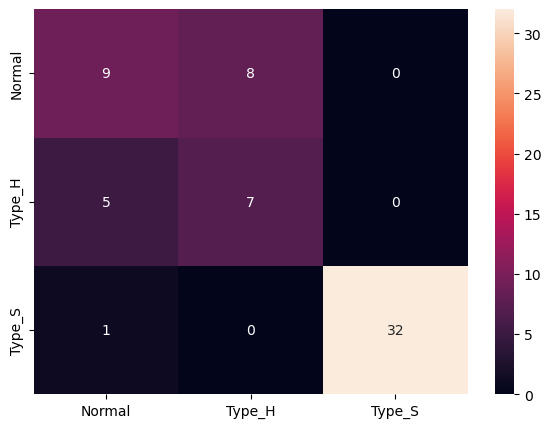

In [136]:
conf_mat = confusion_matrix(y_test, predicted_labels,labels=[0, 1,2])
df_cm = pd.DataFrame(conf_mat, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Normal","Type_H","Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

Our model predicts Type_S correctly most of the time. Only one misclassification on this class.
Misclassification of labels are more when predicting normal class.

In [137]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.60      0.53      0.56        17
           1       0.47      0.58      0.52        12
           2       1.00      0.97      0.98        33

    accuracy                           0.77        62
   macro avg       0.69      0.69      0.69        62
weighted avg       0.79      0.77      0.78        62



1. Accuracy is 77% but the Precision score is high for Class 2 = "Type_S".
2. Here Recall tells that very less percentage of class 0 and 1 is predicted correctly from actual values.
4. By F1 score we can say that precison and recall is balanced for Normal class by 56% and for Type_H class by 52%.
5. We have maximum F1 score for Type_S class.

We dont have enough sample of class 0 and 1 to train the model.
We will do the sampling and check how recall values improves in this case.

# 5. Performance Improvement: 

A. Experiment with various parameters to improve performance of the base model.

In [138]:
# K - Nearest Neighbors

# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [15,20,23,25], 
              'weights': ['uniform', 'distance'],
              'metric' : ['minkowski','euclidean','manhattan'],
              'leaf_size' : [10,20,30,40]
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=15,
                     weights='distance')

B. Clearly showcase improvement in performance achieved

In [139]:
from sklearn import metrics
y_pred = knn.predict(X_test)
# Calculating the accuracy
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of KNN model : ', acc_knn )

Accuracy of KNN model :  83.87


Here we notice that the KNN model has improved accuracy from 77% to 83.87% after hyperparameter tuning.

C. Clearly state which parameters contributed most to improve model performance

leaf_size=10, metric='manhattan', n_neighbors=15, weights='distance' are the model parameters which contributed to improve the performance.

A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.

# Importing all libraries

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline

# 1. Data Understanding and Preparation

A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.

In [141]:
Data1 = pd.read_csv('Downloads/Part2_Data1.csv')
Data2 = pd.read_csv('Downloads/Part2_Data2.csv')

B. Print shape and Column Names and DataTypes of both the Dataframes.

In [142]:
Data1.shape

(5000, 8)

In [143]:
Data2.shape

(5000, 7)

Both the data frames have 5000 rows but Data1 has 8 columns when compared to Data2 which indicates that there is no target variable in Data2

C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame 

In [144]:
new_data=Data1.merge(Data2,left_on='ID',right_on='ID')

In [145]:
new_data.shape

(5000, 14)

Final Dataframe has 14 columns and 5000 rows

D. Change Datatype of below features to ‘Object’
- ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

In [146]:
col=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard','LoanOnCard']
for i in col:
    new_data[i]=new_data[i].astype('category')

In [147]:
new_data.dtypes

ID                        int64
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

We can see that the dataype has been changed as category for few variables

# 2. Data Exploration and Analysis:

A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. 

<Axes: >

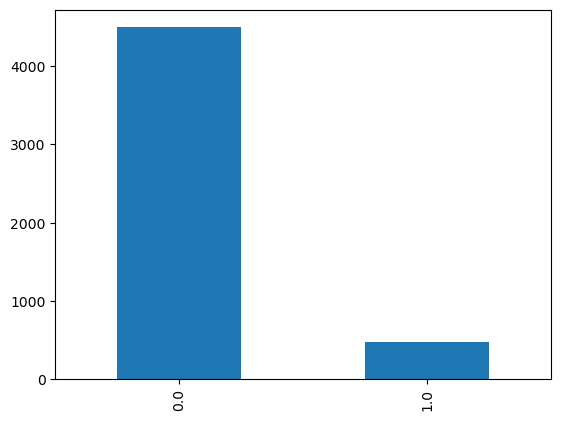

In [148]:
pd.value_counts(new_data["LoanOnCard"]).plot(kind="bar")

We infer that the data is imbalanced as 90% of people does not have loan on credit card

B. Check the percentage of missing values and impute if required

In [149]:
new_data.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

As there are very less missing values in the dataset, we will drop those records.

In [150]:
new_data.dropna(axis=0,inplace=True)

In [151]:
new_data.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [152]:
new_data.shape

(4980, 14)

All the missing records are dropped

C. Check for unexpected values in each categorical variable and impute with best suitable value.

In [153]:
new_data['HiddenScore'].value_counts()

1    1466
2    1293
4    1215
3    1006
Name: HiddenScore, dtype: int64

In [154]:
new_data['Level'].value_counts()

1    2089
3    1496
2    1395
Name: Level, dtype: int64

In [155]:
new_data['Security'].value_counts()

0    4460
1     520
Name: Security, dtype: int64

In [156]:
new_data['FixedDepositAccount'].value_counts()

0    4678
1     302
Name: FixedDepositAccount, dtype: int64

In [157]:
new_data['InternetBanking'].value_counts()

1    2974
0    2006
Name: InternetBanking, dtype: int64

In [158]:
new_data['CreditCard'].value_counts()

0    3514
1    1466
Name: CreditCard, dtype: int64

From above output, we see that there are no unexpected values present in the categorical variables.

Dropping few Independent variables as they don't influence the target variable

In [159]:
new_data.drop(['ID','Age','CustomerSince','ZipCode'],axis=1,inplace=True)

In [160]:
new_data.head()

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,180,1,8.9,3,0,0,0,0,0,1.0
10,105,4,2.4,3,0,0,0,0,0,0.0
11,45,3,0.1,2,0,0,0,1,0,0.0
12,114,2,3.8,3,0,1,0,0,0,0.0
13,40,4,2.5,2,0,0,0,1,0,0.0


Let us check if other categorical columns affect the target variable or not.

In [161]:
cat_cols=list(new_data.select_dtypes(include=['category']).columns)

In [162]:
cat_cols

['HiddenScore',
 'Level',
 'Security',
 'FixedDepositAccount',
 'InternetBanking',
 'CreditCard',
 'LoanOnCard']

In [163]:
cat_cols.remove('LoanOnCard')

In [164]:
for i in cat_cols:
    crosstab=pd.crosstab(new_data['LoanOnCard'],new_data[i])
    chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
    if p_value < 0.05:  
        print('{} Rejecting Null Hypothesis. \n There is significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m',i))
    print('\n')

 Rejecting Null Hypothesis. 
 There is significant difference in HiddenScore Feature for different category of target variable(Loan on card)


 Rejecting Null Hypothesis. 
 There is significant difference in Level Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in Security Feature for different category of target variable(Loan on card)


 Rejecting Null Hypothesis. 
 There is significant difference in FixedDepositAccount Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in InternetBanking Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in CreditCard Feature for different category of target variable(Loan on card)




From the above result, we infer that Security, InternetBanking and CreditCard doesn't affect the target variable so they can be removed before model building.

In [165]:
new_data.drop(['Security','CreditCard','InternetBanking'],axis=1,inplace=True)

In [166]:
new_data.head()

,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,FixedDepositAccount,LoanOnCard
9,180,1,8.9,3,0,0,1.0
10,105,4,2.4,3,0,0,0.0
11,45,3,0.1,2,0,0,0.0
12,114,2,3.8,3,0,0,0.0
13,40,4,2.5,2,0,0,0.0


Checking for outliers in the data before building model

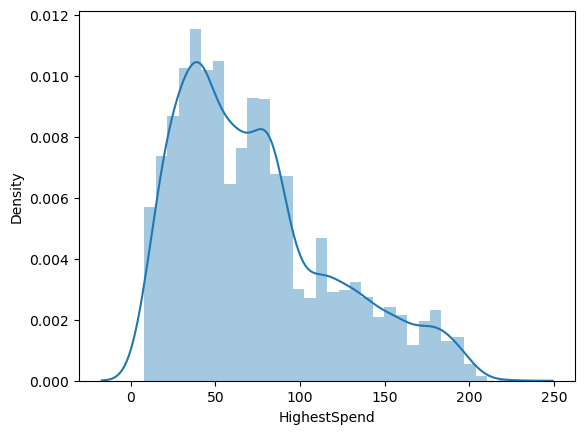

In [167]:
sns.distplot(new_data['HighestSpend']);

<Axes: xlabel='MonthlyAverageSpend'>

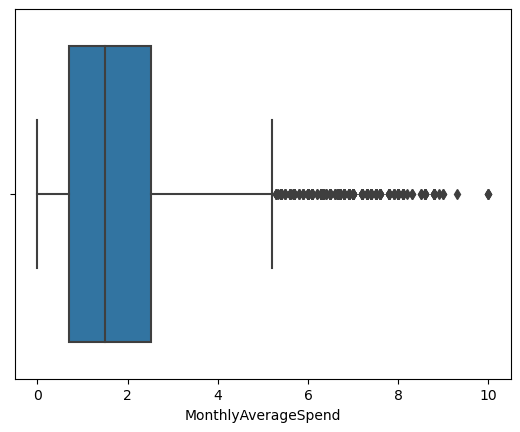

In [168]:
sns.boxplot(x = 'MonthlyAverageSpend', data = new_data)

<Axes: xlabel='Mortgage'>

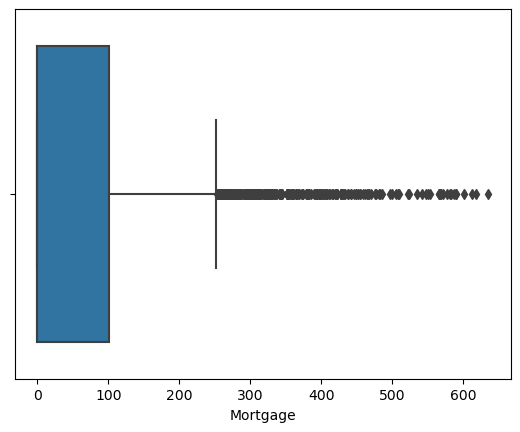

In [169]:
sns.boxplot(x = 'Mortgage', data= new_data)

We can clearly see that the data for above three features is highly right skewed because of the outliers.

# 3. Data Preparation and model building:

A. Split data into X and Y

In [170]:
x=new_data.drop(columns='LoanOnCard')
y=new_data['LoanOnCard']

B. Split data into train and test. Keep 25% data reserved for testing

In [171]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

C. Train a Supervised Learning Classification base model - Logistic Regression.

In [172]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9443105756358768
Accuracy on Test data: 0.9518072289156626


94.43% accuracy on training set and 95.18% accuracy on test set.
Here training set accuracy and testing accuracy are balanced.

D. Print evaluation metrics for the model and clearly share insights.

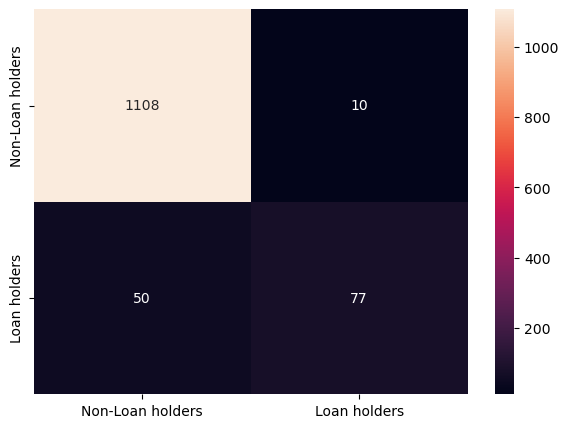

In [173]:
cm = confusion_matrix(y_test, logit_pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

Only 10 are predicted wrongly as Loan Holders and 50 were predicted wrongly as Non-Loan holders

In [174]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1118
         1.0       0.89      0.61      0.72       127

    accuracy                           0.95      1245
   macro avg       0.92      0.80      0.85      1245
weighted avg       0.95      0.95      0.95      1245



Here you can see model is poor in predicting class 1 compared to class 0
Accuracy is good but in this case we need to look on recall value

Here Recall tells that very less percentage of class 1 is predicted correctly from actual values
We dont have enough sample of class 1 to train the model.

Recall score can be improved by resampling the training set as the dataset is imbalanced. 

E. Balance the data using the right balancing technique. 
i. Check distribution of the target variable
ii. Say output is class A : 20% and class B : 80%
iii. Here you need to balance the target variable as 50:50.
iv. Try appropriate method to achieve the same.

<Axes: xlabel='LoanOnCard', ylabel='count'>

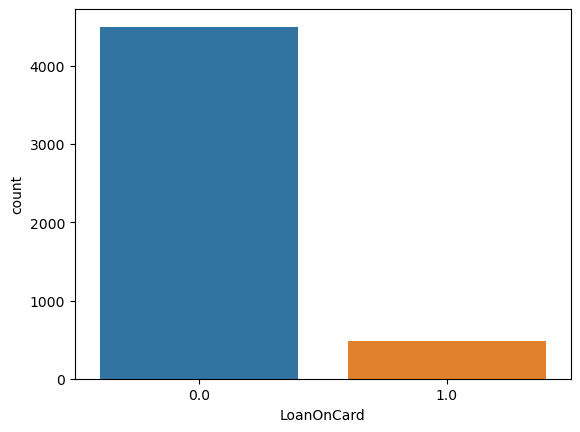

In [175]:
sns.countplot(x = 'LoanOnCard',data=new_data)

There is huge imbalance in target variable.

In [176]:
#Use label encoder to convert categorical variables to one-hot encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_data['LoanOnCard']=le.fit_transform(new_data['LoanOnCard'])
new_data['LoanOnCard'].value_counts()

0    4500
1     480
Name: LoanOnCard, dtype: int64

We can clearly see that the data is imbalanced which may lead to predicting Non-Loan holders. 

Class Imbalance can be improved by using resampling techniques such as - 
1. Undersampling: It is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.

2. Oversampling: It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class

Here we will use oversampling because undersampling may remove important information from the dataset. 

# SMOTE

We will be using SMOTE (Synthetic Minority Oversampling Technique) that works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

If we do resampling on entire data it may leak information to validation data as well. we need to test the model with unseen information. so we will do sampling only on training data.

In [177]:
from imblearn.over_sampling import SMOTENC
smotenc = SMOTENC(categorical_features=[1,3,4,5],random_state = 10)
x_res, y_res = smotenc.fit_resample(X_train, y_train)

In [178]:
print('Before sampling:')
print(y_train.value_counts())

Before sampling:
0.0    3382
1.0     353
Name: LoanOnCard, dtype: int64


In [179]:
print('After sampling:')
print(y_res.value_counts())

After sampling:
0.0    3382
1.0    3382
Name: LoanOnCard, dtype: int64


Now the target variable is balanced.

F. Again train the same previous model on balanced data.

In [180]:
X_train, X_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.25, random_state=10)

In [181]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.9012418687167356
Accuracy on Test data: 0.9030159668835009


we can see there is decrease in test accuracy.

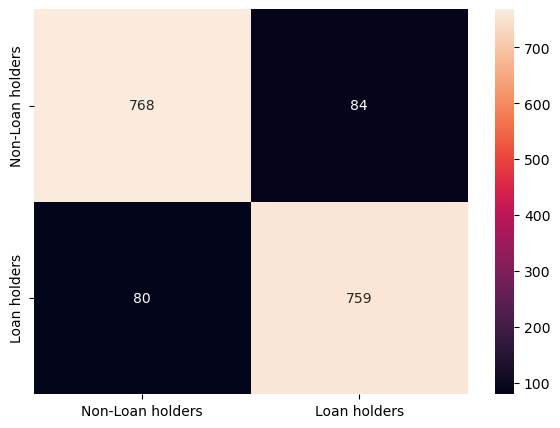

In [182]:
cm2 = confusion_matrix(y_test, logit_pred, labels=[0, 1])

data_cm2 = pd.DataFrame(cm2, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(data_cm2, annot=True ,fmt='g')
plt.show()

G. Print evaluation metrics and clearly share differences observed

In [183]:
print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.91      0.90      0.90       852
         1.0       0.90      0.90      0.90       839

    accuracy                           0.90      1691
   macro avg       0.90      0.90      0.90      1691
weighted avg       0.90      0.90      0.90      1691



After running the same model on the balanced data, we can see that the accuracy has reduced
However, we get a good recall value but the precision value is reduced

# 4. Performance Improvement

A. Train a base model each for SVM, KNN

In [184]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(X_train , y_train)
pred=svc.predict(X_test)
print('Model accuracy obtained using SVM is: {0:0.3f}'. format(accuracy_score(y_test, pred)))

Model accuracy obtained using SVM is: 0.882


In [185]:
print("classification  Matrix:\n",classification_report(y_test,pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.92      0.83      0.88       852
         1.0       0.85      0.93      0.89       839

    accuracy                           0.88      1691
   macro avg       0.89      0.88      0.88      1691
weighted avg       0.89      0.88      0.88      1691



In [186]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' )
KNN.fit(X_train , y_train)
predicted_labels = KNN.predict(X_test)

In [187]:
print('Accuracy on Training data:',KNN.score(X_train, y_train))
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.9631381825349892
Accuracy on Test data: 0.9343583678296866


In [188]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.97      0.90      0.93       852
         1.0       0.90      0.97      0.94       839

    accuracy                           0.93      1691
   macro avg       0.94      0.93      0.93      1691
weighted avg       0.94      0.93      0.93      1691



B. Tune parameters for each of the models wherever required and finalize a model. 

In [189]:
# K - Nearest Neighbors

# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn_2 = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [5,10,20,30], 
              'weights': ['uniform', 'distance'],
              'metric' : ['minkowski','euclidean','manhattan']}

# Run the grid search
from sklearn.model_selection import GridSearchCV
grid_obj = GridSearchCV(knn_2, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn_2 = grid_obj.best_estimator_

# Train the model using the training sets 
knn_2.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [190]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.938 total time=   0.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.854 total time=   0.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   0.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.918 total time=   0.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.902 total time=   0.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.895 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.897 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.905 total time=   0.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.906 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.876 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.0001], 'kernel': ['rbf']},
             verbose=3)

In [191]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


C. Print evaluation metrics for final model.

In [192]:
from sklearn import metrics
y_pred = knn_2.predict(X_test)
# Calculating the accuracy
acc_knn_2 = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of KNN model : ', acc_knn_2 )

Accuracy of KNN model :  95.45


In [193]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       852
         1.0       0.97      0.97      0.97       839

    accuracy                           0.97      1691
   macro avg       0.97      0.97      0.97      1691
weighted avg       0.97      0.97      0.97      1691



D. Share improvement achieved from base model to final model.

1. After hyperparameter tuning, we observe that the accuracy has increased from 93% to 95% using KNN algorithm with metric='manhattan', weights='distance' parameters.
2. We see that the hyperparameter tuning has improved accuracy from 88% to 97% using SVC algorithm

We are selecting final model as KNN as it performs well in training and testing test. It is also has good recall value after hyperparameter tuning.
Sampling improved to predict minority classes as well
Data should be collected equally for all the classes.
Few customers does't have credit card but those customer having loan on card. This data error can be avoided